In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
import IPython.display as ipd
from tqdm.notebook import tqdm
import subprocess

### Process Video

In [3]:
input_file = '/content/drive/MyDrive/UH Spring 2024/COSC 4331 Real-Time Systems & Embedded Programming/Project/Object-Detection/src/data/Video1.mov'
subprocess.run(['ffmpeg',
                '-i',
                input_file,
                '-qscale',
                '0',
                'Video1.mp4',
                '-loglevel',
                'quiet']
              )

CompletedProcess(args=['ffmpeg', '-i', '/content/drive/MyDrive/UH Spring 2024/COSC 4331 Real-Time Systems & Embedded Programming/Project/Object-Detection/src/data/Video1.mov', '-qscale', '0', 'Video1.mp4', '-loglevel', 'quiet'], returncode=0)

In [4]:
ipd.Video('/content/Video1.mp4', embed=True, width=700)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
input_file = '/content/drive/MyDrive/UH Spring 2024/COSC 4331 Real-Time Systems & Embedded Programming/Project/Object-Detection/src/data/Video2.mov'
subprocess.run(['ffmpeg',
                '-i',
                input_file,
                '-qscale',
                '0',
                'Video2.mp4',
                '-loglevel',
                'quiet']
              )

CompletedProcess(args=['ffmpeg', '-i', '/content/drive/MyDrive/UH Spring 2024/COSC 4331 Real-Time Systems & Embedded Programming/Project/Object-Detection/src/data/Video2.mov', '-qscale', '0', 'Video2.mp4', '-loglevel', 'quiet'], returncode=1)

In [ ]:
ipd.Video('/content/Video2.mp4', embed=True, width=700)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
input_file = '/content/drive/MyDrive/UH Spring 2024/COSC 4331 Real-Time Systems & Embedded Programming/Project/Object-Detection/src/data/Video3.mov'
subprocess.run(['ffmpeg',
                '-i',
                input_file,
                '-qscale',
                '0',
                'Video3.mp4',
                '-loglevel',
                'quiet']
              )

CompletedProcess(args=['ffmpeg', '-i', '/content/drive/MyDrive/UH Spring 2024/COSC 4331 Real-Time Systems & Embedded Programming/Project/Object-Detection/src/data/Video3.mov', '-qscale', '0', 'Video3.mp4', '-loglevel', 'quiet'], returncode=1)

In [ ]:
ipd.Video('/content/Video3.mp4', embed=True, width=700)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
input_file = '/content/drive/MyDrive/UH Spring 2024/COSC 4331 Real-Time Systems & Embedded Programming/Project/Object-Detection/src/data/0000f77c-6257be58.mov'
# subprocess.run(['ffmpeg', '-i', input_file, '-qscale', '0', '0000f77c-6257be58.mp4', '-loglevel', 'quiet'])
subprocess.run(['ffmpeg',
                '-i',
                input_file,
                '-qscale',
                '0',
                '0000f77c-6257be58.mp4',
                '-loglevel',
                'quiet']
              )

CompletedProcess(args=['ffmpeg', '-i', '/content/drive/MyDrive/UH Spring 2024/COSC 4331 Real-Time Systems & Embedded Programming/Project/Object-Detection/src/data/0000f77c-6257be58.mov', '-qscale', '0', '0000f77c-6257be58.mp4', '-loglevel', 'quiet'], returncode=1)

In [5]:
!ls -GFlash --color

total 14M
4.0K drwxr-xr-x 1 root 4.0K May  8 23:52 ./
4.0K drwxr-xr-x 1 root 4.0K May  8 23:51 ../
4.0K drwxr-xr-x 4 root 4.0K May  7 13:21 .config/
4.0K drwx------ 5 root 4.0K May  8 23:52 drive/
4.0K drwxr-xr-x 1 root 4.0K May  7 13:22 sample_data/
 14M -rw-r--r-- 1 root  14M May  8 23:53 Video1.mp4


### Display Video

In [6]:
ipd.Video('/content/Video1.mp4', embed=True, width=700)

Output hidden; open in https://colab.research.google.com to view.

### Open Video & Read Metadata

In [7]:
cap = cv2.VideoCapture('/content/Video1.mp4')

In [8]:
num_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print('Total Number of Frames:', num_frames)

Total Number of Frames: 1204.0


In [9]:
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height: {height}, Width: {width}')

Height: 720.0, Width: 1280.0


In [10]:
frames_per_second = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS: {frames_per_second:0.2f}')

FPS: 29.97


In [11]:
cap.release()

### Pull Images From Video

In [12]:
cap = cv2.VideoCapture('/content/Video1.mp4')
ret, img = cap.read()
print(f'Returned {ret} and img of shape {img.shape}')

Returned True and img of shape (720, 1280, 3)


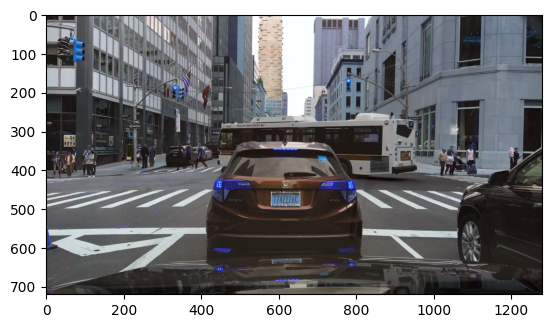

In [13]:
plt.imshow(img)

### Add RGB to Image

In [14]:
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis('off')

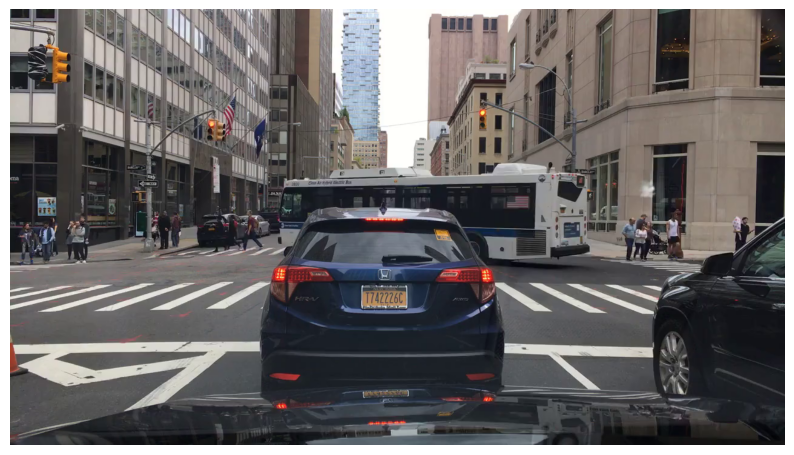

In [15]:
display_cv2_img(img)

In [16]:
cap.release()

### Iterate Over Frames

In [17]:
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()

cap = cv2.VideoCapture('/content/Video1.mp4')
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0

for frame in range(num_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 100 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.tight_layout()
plt.show()
cap.release()

Output hidden; open in https://colab.research.google.com to view.

### Classify Video Images

In [18]:
labels = pd.read_csv('/content/drive/MyDrive/UH Spring 2024/COSC 4331 Real-Time Systems & Embedded Programming/Project/Object-Detection/src/data/mot_labels.csv', low_memory=False)

video_labels = (labels.query('videoName == "Video1"').reset_index(drop=True).copy())

video_labels['video_frame'] = (video_labels['frameIndex'] * 11.9).round().astype('int')

In [19]:
video_labels['category'].value_counts()

Series([], Name: count, dtype: int64)

In [20]:
cap = cv2.VideoCapture('/content/Video1.mp4')
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0

for frame in range(num_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame == 400:
        break

cap.release()

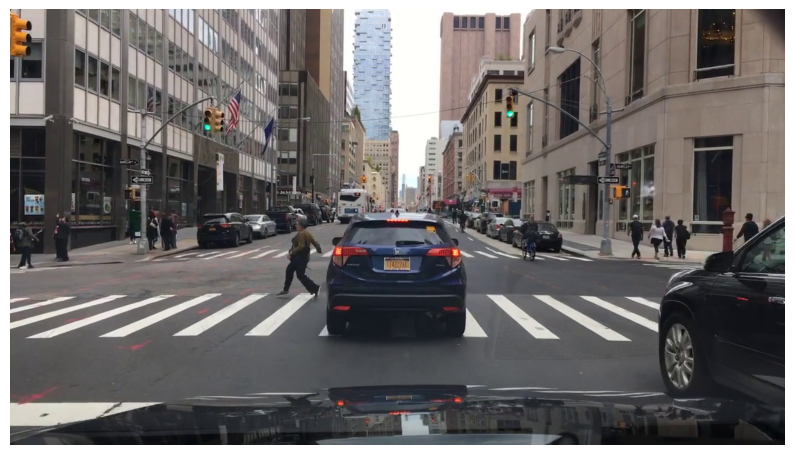

In [21]:
display_cv2_img(img)

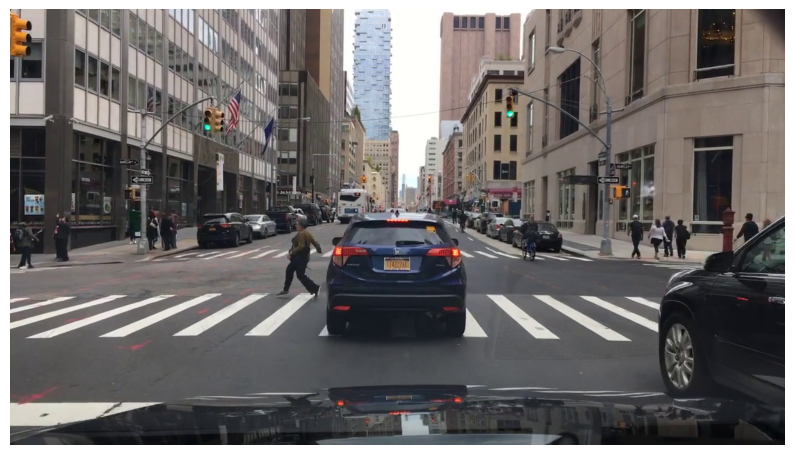

In [ ]:
img_example = img.copy()
frame_labels = video_labels.query('video_frame == 400')

for i, d in frame_labels.iterrows():
    pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
    cv2.rectangle(img_example, pt1, pt2, (0, 0, 255), 3)

display_cv2_img(img_example)

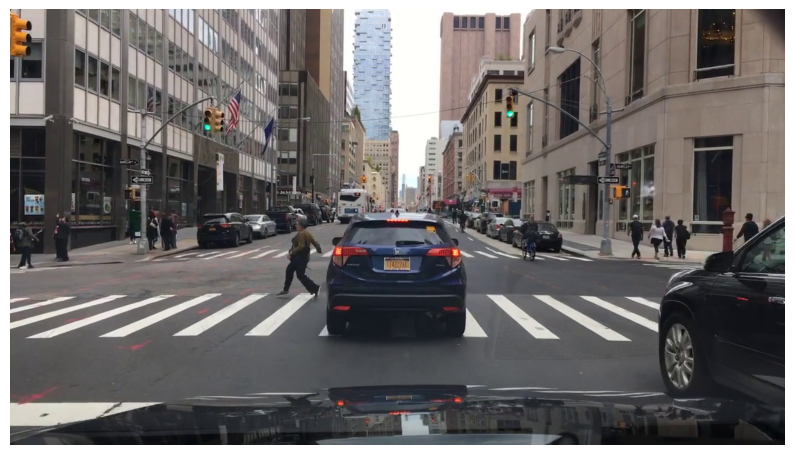

In [ ]:
color_map = {
      "car": (0, 0, 255),
      "truck": (0, 0, 100),
      "pedestrian": (255, 0, 0),
      "other vehicle": (0, 0, 150),
      "rider": (200, 0, 0),
      "bicycle": (0, 255, 0),
      "other person": (200, 0, 0),
      "trailer": (0, 150, 150),
      "motorcycle": (0, 150, 0),
      "bus": (0, 0, 100),
}

img_example = img.copy()
frame_labels = video_labels.query('video_frame == 400')

for i, d in frame_labels.iterrows():
    pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
    color = color_map[d['category']]
    cv2.rectangle(img_example, pt1, pt2, color, 3)

display_cv2_img(img_example)

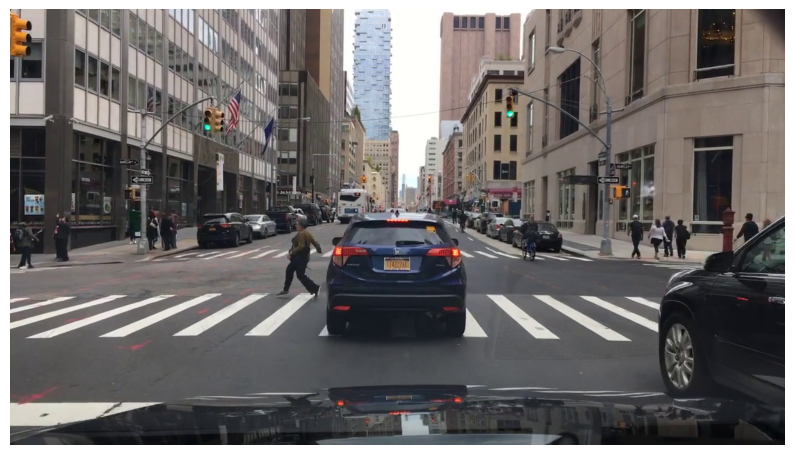

In [ ]:
frame_labels = video_labels.query('video_frame == @frame')
font = cv2.FONT_HERSHEY_TRIPLEX
img_example = img.copy()

for i, d in frame_labels.iterrows():
    pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
    color = color_map[d['category']]
    img_example = cv2.rectangle(img_example, pt1, pt2, color, 3)
    pt_text = int(d['box2d.x1'] + 5), int(d['box2d.y1'] + 10)
    img_example = cv2.putText(img_example, d['category'], pt_text, font, 0.5, color)

display_cv2_img(img_example)
cap.release()

### Label Video

In [ ]:
def add_annotations(img, frame, video_lables):
    max_frame = video_labels.query('video_frame <= @frame')['video_frame'].max()
    frame_labels = video_labels.query('video_frame == @max_frame')
    for i, d in frame_labels.iterrows():
      pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
      pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
      color = color_map[d['category']]
      img = cv2.rectangle(img, pt1, pt2, color, 3)
    return img

In [ ]:
!rm -r out_test.mp4

rm: cannot remove 'out_test.mp4': No such file or directory


In [ ]:
VIDEO_CODEC = 'mp4v'
fps = 59.94
width = 1280
height = 720
out = cv2.VideoWriter('out_test.mp4', cv2.VideoWriter_fourcc(*VIDEO_CODEC), fps, (width, height))

cap = cv2.VideoCapture('/content/0000f77c-6257be58.mp4')
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

for frame in tqdm(range(num_frames), total = num_frames):
    ret, img = cap.read()
    if ret == False:
        break
    img = add_annotations(img, frame, video_labels)
    out.write(img)
out.release()
cap.release()

0it [00:00, ?it/s]

In [ ]:
!ls -GFlash -color

total 578M
237M -rw-r--r--  1 root 237M May  8 08:17 yolov3.weights
4.0K -rwxr-xr-x  1 root  108 May  8 08:13 video_yolov4.sh*
4.0K -rwxr-xr-x  1 root  108 May  8 08:13 video_yolov3.sh*
 77M -rw-r--r--  1 root  77M May  8 08:51 Video3.mp4
 72M -rw-r--r--  1 root  72M May  8 08:50 Video2.mp4
 78M -rw-r--r--  1 root  78M May  8 08:48 Video1.mp4
4.0K -rw-r--r--  1 root 2.8K May  8 08:13 vcpkg.json.opencv23
4.0K -rw-r--r--  1 root 2.9K May  8 08:13 vcpkg.json
4.0K drwxr-xr-x  3 root 4.0K May  8 08:13 src/
4.0K drwxr-xr-x  4 root 4.0K May  8 08:13 scripts/
4.0K drwxr-xr-x  2 root 4.0K May  8 08:13 results/
 68K -rw-r--r--  1 root  67K May  8 08:13 README.md
4.0K -rw-r--r--  1 root  712 May  8 08:13 package.xml
4.0K -rw-r--r--  1 root  258 May  8 09:10 out_test.mp4
 56M -rw-r--r--  1 root  56M May  8 08:20 output2.mp4
 56M -rw-r--r--  1 root  56M May  8 08:20 output1.avi
4.0K drwxr-xr-x  2 root 4.0K May  8 08:15 obj/
4.0K -rwxr-xr-x  1 root  159 May  8 08:13 net_cam_v4.sh*
4.0K -rwxr-xr-x  1

### Convert To MP4 & View

In [ ]:
tmp_output_path = 'out_test.mp4'
output_path = 'out_test_compressed.mp4'
subprocess.run(['ffmpeg',
                '-i',
                tmp_output_path,
                '-crf',
                '18',
                '-preset',
                'veryfast',
                '-vcodec',
                'libx264',
                output_path,
                '-loglevel',
                'quiet']
              )

CompletedProcess(args=['ffmpeg', '-i', 'out_test.mp4', '-crf', '18', '-preset', 'veryfast', '-vcodec', 'libx264', 'out_test_compressed.mp4', '-loglevel', 'quiet'], returncode=0)

In [ ]:
ipd.Video('/content/out_test_compressed.mp4', embed=True, width=700)

Output hidden; open in https://colab.research.google.com to view.

# YOLO

In [ ]:
pip install opencv-python

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     -------------------- ------------------- 30.7/61.0 kB 1.4 MB/s eta 0:00:01
     ---------------------------------------- 61.0/61.0 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.6 MB 2.1 MB/s eta 0:00:19
   ---------------------------------------- 0.4/38.6 MB 2.6 MB/s eta 0:00:15
    --------------------------------------- 0.6/38.6 MB 3.3 MB/s eta 0:00:12
    --------------------------------------- 0.7/38.6 MB 3.1 MB/s eta 0:00:13
   - -----------------------------------

In [ ]:
import cv2

In [ ]:
!nvidia-smi

Wed May  8 18:25:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0              42W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
from psutil import *
# This code will return the number of CPU
print("Number of CPU: ", cpu_count())
# This code will return the CPU info
!cat /proc/cpuinfo

Number of CPU:  12
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 7
microcode	: 0xffffffff
cpu MHz		: 2200.146
cache size	: 39424 KB
physical id	: 0
siblings	: 12
core id		: 0
cpu cores	: 6
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp ibrs_enhanced fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat avx512_vnni md_clear arch_capabilities
bugs		: spectre_v1 spectre_v2 spec_sto

In [ ]:
!rm -fr darknet/

In [ ]:
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 15851, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15851 (delta 5), reused 12 (delta 4), pack-reused 15833
Receiving objects: 100% (15851/15851), 14.38 MiB | 25.61 MiB/s, done.
Resolving deltas: 100% (10675/10675), done.


In [ ]:
%cd darknet/
with open('Makefile', 'r') as file:
    filedata = file.read()

# Replace GPU and OPENCV flags
filedata = filedata.replace('GPU=0', 'GPU=1')
filedata = filedata.replace('OPENCV=0', 'OPENCV=1')

# Write the modified Makefile back
with open('Makefile', 'w') as file:
    file.write(filedata)


In [ ]:
import urllib.request

# Specify the URL of the YOLOv3 weights file
url = 'https://pjreddie.com/media/files/yolov3.weights'

# Download the file and save it locally
urllib.request.urlretrieve(url, 'yolov3.weights')

('yolov3.weights', <http.client.HTTPMessage at 0x1ba06784b00>)

In [ ]:
import os

# Specify the path to the darknet executable
darknet_path = './darknet'

# Set the executable permission
os.chmod(darknet_path, 0o755)  # 0o755 corresponds to rwxr-xr-x permission

In [ ]:
%cd darknet/
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘buff’ []8;;https://gcc.gnu.

### Get YOLO Weights

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights
!chmod a+x ./darknet

--2024-05-08 08:15:19--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  36.7MB/s    in 6.9s    

2024-05-08 08:17:13 (34.3 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!apt install ffmpeg libopencv-dev libgtk-3-dev python3-numpy libjpeg-dev libtiff5-dev libavcodec-dev libavformat-dev libswscale-dev libxine2-dev libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev libv4l-dev libtbb-dev qtbase5-dev libfaac-dev libmp3lame-dev libopencore-amrnb-dev libopencore-amrwb-dev libtheora-dev libvorbis-dev libxvidcore-dev x264 v4l-utils unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu10).
libjpeg-dev set to manually installed.
libvorbis-dev is already the newest version (1.3.7-1build2).
libvorbis-dev set to manually installed.
libtbb-dev is already the newest version (2021.5.0-7ubuntu2).
libtbb-dev set to manually installed.
unzip is already the newest version (6.0-26ubuntu3.2).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
libavcodec-dev is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
libswscale-dev set to manually installed.
libopencv-dev is already the newest version (4.5.4+dfsg-9ubuntu4+jammy0).
The following additional packages will be installed:
  gir1.2-a

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Video2.mp4 to Video2.mp4


In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show ../Video1.mp4 -i 0 -out_filename Video1.mp4 -thresh 0.7

Streaming output truncated to the last 5000 lines.
person: 96% 
person: 93% 
person: 91% 
person: 86% 
person: 81% 

FPS:98.0 	 AVG_FPS:95.1

 cvWriteFrame 
Objects:

traffic light: 91% 
car: 99% 
car: 97% 
car: 95% 
car: 90% 
person: 96% 
person: 96% 
person: 94% 
person: 92% 
person: 82% 
person: 78% 

FPS:99.0 	 AVG_FPS:95.1

 cvWriteFrame 
Objects:

traffic light: 95% 
traffic light: 71% 
car: 99% 
car: 97% 
car: 96% 
car: 90% 
person: 96% 
person: 92% 
person: 88% 
person: 85% 
person: 77% 
person: 73% 
person: 72% 

FPS:99.6 	 AVG_FPS:95.1

 cvWriteFrame 
Objects:

traffic light: 95% 
car: 99% 
car: 98% 
car: 97% 
car: 92% 
person: 95% 
person: 90% 
person: 90% 
person: 77% 
person: 73% 
person: 71% 

FPS:100.0 	 AVG_FPS:95.1

 cvWriteFrame 
Objects:

traffic light: 92% 
car: 99% 
car: 98% 
car: 97% 
car: 90% 
person: 92% 
person: 91% 
person: 90% 
person: 84% 
person: 75% 
person: 73% 

FPS:100.4 	 AVG_FPS:95.1

 cvWriteFrame 
Objects:

traffic light: 87% 
car: 98% 
car: 97% 
ca

In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show ../Video2.mp4 -i 0 -out_filename Video2.mp4 -thresh 0.7

Streaming output truncated to the last 5000 lines.
FPS:100.1 	 AVG_FPS:117.1

 cvWriteFrame 
Objects:

traffic light: 77% 
bus: 98% 
car: 99% 
car: 83% 
person: 99% 
person: 95% 
person: 92% 
person: 91% 
person: 90% 
person: 89% 
person: 88% 
person: 88% 
person: 84% 
person: 78% 

FPS:100.3 	 AVG_FPS:117.1

 cvWriteFrame 
Objects:

traffic light: 87% 
bus: 98% 
car: 98% 
person: 99% 
person: 97% 
person: 97% 
person: 95% 
person: 94% 
person: 93% 
person: 92% 
person: 91% 
person: 77% 
person: 76% 

FPS:100.4 	 AVG_FPS:117.1

 cvWriteFrame 
Objects:

traffic light: 83% 
bus: 99% 
car: 98% 
person: 99% 
person: 98% 
person: 97% 
person: 95% 
person: 92% 
person: 91% 
person: 83% 
person: 77% 

FPS:100.7 	 AVG_FPS:117.1

 cvWriteFrame 
Objects:

traffic light: 82% 
bus: 98% 
car: 95% 
person: 99% 
person: 98% 
person: 98% 
person: 95% 
person: 94% 
person: 93% 
person: 93% 
person: 88% 
person: 86% 

FPS:101.4 	 AVG_FPS:117.1

 cvWriteFrame 
Objects:

traffic light: 85% 
bus: 96% 
car:

In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show ../Video3.mp4 -i 0 -out_filename Video3.mp4 -thresh 0.7

Streaming output truncated to the last 5000 lines.

FPS:101.3 	 AVG_FPS:100.9

 cvWriteFrame 
Objects:

car: 96% 

FPS:101.9 	 AVG_FPS:100.9

 cvWriteFrame 
Objects:

car: 97% 

FPS:103.0 	 AVG_FPS:100.9

 cvWriteFrame 
Objects:

car: 96% 
car: 74% 

FPS:104.0 	 AVG_FPS:100.9

 cvWriteFrame 
Objects:

car: 94% 

FPS:104.3 	 AVG_FPS:100.9

 cvWriteFrame 
Objects:

car: 90% 

FPS:105.1 	 AVG_FPS:100.9

 cvWriteFrame 
Objects:

car: 96% 

FPS:106.3 	 AVG_FPS:100.9

 cvWriteFrame 
Objects:

car: 96% 

FPS:107.5 	 AVG_FPS:100.9

 cvWriteFrame 
Objects:

car: 95% 

FPS:108.6 	 AVG_FPS:100.9

 cvWriteFrame 
Objects:

car: 94% 

FPS:109.4 	 AVG_FPS:100.9

 cvWriteFrame 
Objects:

car: 97% 

FPS:110.4 	 AVG_FPS:100.9

 cvWriteFrame 
Objects:

car: 97% 

FPS:111.2 	 AVG_FPS:100.9

 cvWriteFrame 
Objects:

car: 95% 

FPS:112.3 	 AVG_FPS:100.9

 cvWriteFrame 
Objects:

car: 94% 

FPS:112.0 	 AVG_FPS:100.9

 cvWriteFrame 
Objects:

car: 95% 

FPS:112.3 	 AVG_FPS:100.9

 cvWriteFrame 
Objects:

car:

In [ ]:
files.download('Video1.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('Video2.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('Video3.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Track Real-Time

In [ ]:
pip install sort-track

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 43.5 MB/s eta 0:00:00
  Created wheel for sort-track: filename=sort_track-0.0.8-py3-none-any.whl size=5886 sha256=7113439930975327af1cc4ba0313ba7dc4cde9859c4464125cc197debf48eb3c
  Stored in directory: /root/.cache/pip/wheels/a2/05/2e/61b7c68e9aae202d8cfa450bd0c2f12f5c72cfe09656c58336
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=f75dfb595cf0a950ee40ffec27a5dd85ddabaf78552e265b757ab707cfe13f66
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built sort-track filterpy
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling sci

In [ ]:
from sort.tracker import SortTracker
import time

In [ ]:
tracker = SortTracker()

In [ ]:
cap = cv2.VideoCapture('/content/Video1.mp4')

In [ ]:
# Loop through video frames
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection with YOLO
    detections = yolo.detect_objects(frame)

    # Associate detections with previous tracks using SORT
    tracked_objects = tracker.update(detections)

    # Update object tracks with start and end times
    for obj_id, bbox in tracked_objects.items():
        if obj_id not in object_tracks:
            # New object track detected
            object_tracks[obj_id] = {'start_time': time.time(), 'end_time': None}
        else:
            # Update end time for existing object track
            object_tracks[obj_id]['end_time'] = time.time()

    # Display annotated frame (optional)
    for obj_id, bbox in tracked_objects.items():
        x1, y1, x2, y2 = bbox
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f"ID: {obj_id}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    cv2.imshow('Object Tracking', frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()


NameError: name 'yolo' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Extract confidence scores from detections
confidence_scores = [detection['confidence'] for detection in detections]

# Plot histogram of confidence scores
plt.figure(figsize=(8, 6))
plt.hist(confidence_scores, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.title('Histogram of Confidence Scores')
plt.grid(True)
plt.show()

NameError: name 'detections' is not defined

In [ ]:
import subprocess

# Define the command as a list of strings
command = [
    "./darknet",
    "detector",
    "demo",
    "cfg/coco.data",
    "cfg/yolov3.cfg",
    "yolov3.weights",
    "-dont_show",
    "/content/Video1.mp4",
    "-i",
    "0",
    "-out_filename",
    "output1.avi",
    "-thresh",
    "0.7"
]

# Execute the command and capture the output
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Wait for the process to complete
stdout, stderr = process.communicate()

# Print the output
print("Output:")
print(stdout.decode('utf-8'))

# Print any errors
if stderr:
    print("Errors:")
    print(stderr.decode('utf-8'))


Output:
Demo
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 

 seen 64, trained: 32013 K-images (500 Kilo-batches_64) 
video file: /content/Video1.mp4
Video stream: 1280 x 720 
Objects:


FPS:0.0 	 AVG_FPS:0.0
Objects:

traffic light: 96% 
traffic light: 80% 
bus: 96% 
car: 98% 
car: 96% 
car: 93% 
person: 99% 
person: 98% 
person: 96% 
person: 96% 
person: 95% 
person: 93% 
person: 93% 
person: 85% 
person: 75% 
person: 73% 

FPS:9.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

traffic light: 97% 
traffic light: 80% 
traffic light: 75% 
bus: 96% 
car: 98% 
car: 96% 
car: 95% 
person: 99% 
person: 97% 
person: 97% 
person: 96% 
person: 96% 
person: 94% 
person: 94% 
person: 88% 
person: 74% 
person: 71% 

FPS:16.7 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

traffic light: 97% 
traffic light: 75% 
bus: 96% 
car: 98% 
car: 98% 
car: 95% 
person: 99% 
person: 99% 
person: 98% 
person: 95% 
person: 94% 
person: 92% 
person: 88% 
person: 82% 
p

In [ ]:
import subprocess

# Define the command as a list of strings
command = [
    "./darknet",
    "detector",
    "demo",
    "cfg/coco.data",
    "cfg/yolov3.cfg",
    "yolov3.weights",
    "-dont_show",
    "/content/Video3.mp4",
    "-i",
    "0",
    "-out_filename",
    "output1.avi",
    "-thresh",
    "0.7"
]

# Execute the command and capture the output
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Wait for the process to complete
stdout, stderr = process.communicate()

# Print the output
print("Output:")
print(stdout.decode('utf-8'))

# Print any errors
if stderr:
    print("Errors:")
    print(stderr.decode('utf-8'))

Output:
Demo
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 

 seen 64, trained: 32013 K-images (500 Kilo-batches_64) 
video file: /content/Video3.mp4
Video stream: 1280 x 720 
Objects:


FPS:0.0 	 AVG_FPS:0.0
Objects:

truck: 77% 
car: 99% 
car: 84% 
car: 77% 
car: 77% 
person: 78% 

FPS:9.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

truck: 72% 
car: 98% 
car: 90% 
car: 76% 
car: 70% 

FPS:17.7 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

truck: 91% 
car: 99% 
car: 77% 
car: 70% 

FPS:24.8 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

truck: 86% 
car: 99% 
car: 76% 

FPS:32.0 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

truck: 82% 
car: 99% 
car: 76% 
car: 71% 

FPS:37.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

truck: 75% 
car: 99% 
car: 81% 
person: 74% 

FPS:43.2 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

truck: 86% 
car: 99% 
car: 84% 

FPS:48.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

truck: 79% 
car: 99% 
car: 91% 
person: 79% 

FPS:52.8 	 AVG_FPS: